In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap

np.random.seed(32423)


# Dimensionality reduction

This notebook will present some of the main methodologies used to reduce dimensionality in a dataset.

__add details on reasons for dr__

## The curse of dimensionality

In many tasks related to machine learning, statistics, numerical analysis and data mining, problems arise when the dimensionality of the space (e.g. the feature space) increases to large numbers (> ~100-1000).

The common underlying factor to these "cursed" phenomena is that when the space dimensionality increases, the volume increases so fast that most of the data becomes sparse. This sparsity becomes a significant burden for computational reasons and for tasks that rely on statistical significance

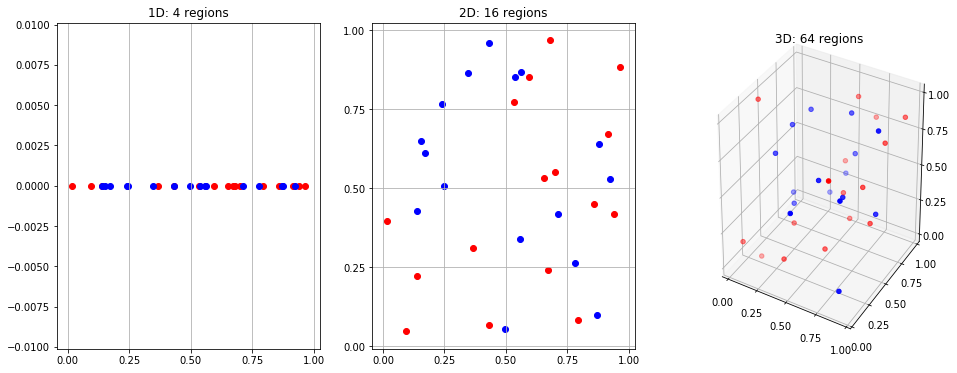

In [10]:
cd_data = np.random.rand(3, 32)

fig = plt.figure(figsize=(16, 6))
ax = [_]*3
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ax[2] = fig.add_subplot(1, 3, 3,projection='3d')

ax[0].scatter(cd_data[0,:16], [0]*16, c="red")
ax[0].scatter(cd_data[0,16:], [0]*16, c="blue")
ax[0].set_xticks(np.arange(0, 1.1, 0.25))
ax[0].grid(axis="x")
ax[0].set_title("1D: 4 regions")


ax[1].scatter(cd_data[0,:16], cd_data[1,:16], c="red")
ax[1].scatter(cd_data[0,16:], cd_data[1,16:], c="blue")
ax[1].set_xticks(np.arange(0, 1.1, 0.25))
ax[1].set_yticks(np.arange(0, 1.1, 0.25))
ax[1].grid(axis="both")
ax[1].set_title("2D: 16 regions")



ax[2].scatter(cd_data[0,:16], cd_data[1,:16], cd_data[2,:16], c="red")
ax[2].scatter(cd_data[0,16:], cd_data[1,16:], cd_data[2,16:], c="blue")
ax[2].set_xticks(np.arange(0, 1.1, 0.25))
ax[2].set_yticks(np.arange(0, 1.1, 0.25))
ax[2].set_zticks(np.arange(0, 1.1, 0.25))
ax[2].set_title("3D: 64 regions")
ax[2].dist = 10
plt.show()

In each unit region (strip, square, cube respectively) of the previous visualization are contained different amounts of datapoints. While each region of the 1D plot contains several points, each cube of the 3D plot contains only a few at most. This problem exacerbates as the number of dimensions increases.

## Dimensionality reduction methods

In general, dimensionality reduction techniques can be divided into two main categories: *feature selection*, and *feature projection/mapping*. 


__Feature selection__ is the selection of a subset of the original features, which means that the features present in the final subset are unaltered.

__Feature extraction__ transforms the high-dimensional feature representation to a lower dimensional one, in which each new feature is some combination of one or more of the original features.


This notebook is focused on this latter category of algorithms.

###
